Setup

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


Data Preparation

In [14]:
# Set the path to the dataset
dataset_path = 'C:/Users/Swapnil/Pictures/Swapnil/Prodigy Infotech Internship/Task-4/leapGestRecog/00'  # Adjust this path to your dataset

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # 20% of data for validation

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


Model Architecture

In [15]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Training

In [16]:
# Train model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator)

# Save model
model.save('hand_gesture_model.h5')


Epoch 1/25


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 856ms/step - accuracy: 0.1246 - loss: 2.2891 - val_accuracy: 0.2925 - val_loss: 2.0405
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 571ms/step - accuracy: 0.4366 - loss: 1.6320 - val_accuracy: 0.5725 - val_loss: 1.3364
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 552ms/step - accuracy: 0.6283 - loss: 1.0919 - val_accuracy: 0.6975 - val_loss: 0.9552
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 554ms/step - accuracy: 0.7767 - loss: 0.6488 - val_accuracy: 0.7550 - val_loss: 0.7266
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 631ms/step - accuracy: 0.8302 - loss: 0.4796 - val_accuracy: 0.7900 - val_loss: 0.6214
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 558ms/step - accuracy: 0.8897 - loss: 0.3591 - val_accuracy: 0.8250 - val_loss: 0.5903
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 555ms/step - accuracy: 0.9032 - loss: 0.2673 - val_accuracy: 0.8550 - val_loss: 0.5061
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 555ms/step - accuracy: 0.9298 - loss: 0.1972 - val_accuracy: 0.840

Model Evaluation

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.8913 - loss: 0.5173
Test accuracy: 0.8774999976158142


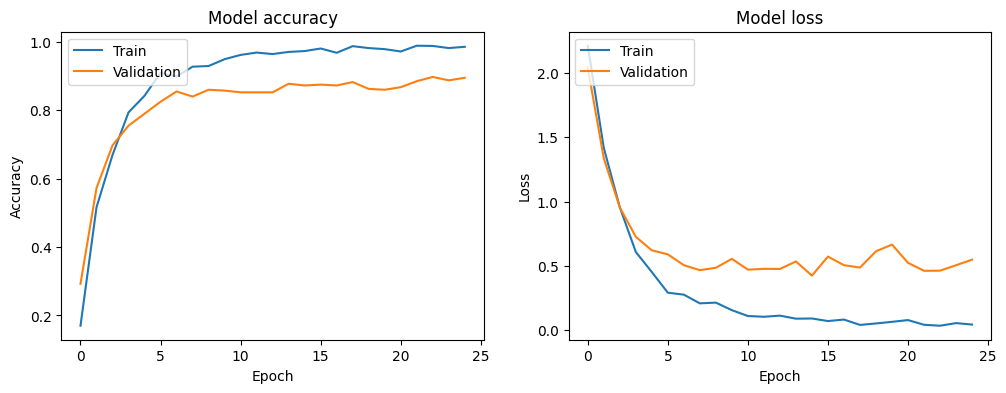

In [17]:
# Evaluate model
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Testing

In [44]:
import cv2
import numpy as np
# Load the saved model
model = tf.keras.models.load_model('hand_gesture_model.h5')

# Class indices
class_names = list(train_generator.class_indices.keys())
print(f"Class names: {class_names}")

# Define the image prediction function
def predict_gesture(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    predictions = model.predict(img)
    class_idx = np.argmax(predictions[0])
    class_label = class_names[class_idx]
    confidence = predictions[0][class_idx]

    return class_label, confidence

# Example usage
image_path = 'C:/Users/Swapnil/Pictures/Swapnil/Prodigy Infotech Internship/Task-4/Test images/img-5.png'  # Replace with your image path
gesture, confidence = predict_gesture(image_path)
print(f"Predicted gesture: {gesture}, Confidence: {confidence:.2f}")

# Display the image with prediction
img = cv2.imread(image_path)
cv2.putText(img, f'Gesture: {gesture}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2.putText(img, f'Confidence: {confidence:.2f}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2.imshow('Predicted Gesture', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Class names: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted gesture: 03_fist, Confidence: 0.95
